# JS14 - Convolutional Neural Network
## Modifikasi CNN CIFAR-10 & CNN untuk MNIST

Nama: Taufik Dimas Edystara <br>
NIM : 2341720062 <br>
Kelas: TI-3G <br


>


## Tujuan

1. Memodifikasi arsitektur CNN pada dataset CIFAR-10 (Praktikum 2) sehingga akurasi **testing > 80%**.
2. Membangun model CNN sederhana untuk klasifikasi **dataset MNIST**.
3. Menganalisis perbedaan performa dan karakteristik model pada kedua dataset.


In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


## Bagian A – Modifikasi CNN CIFAR-10 (> 80%)


In [1]:
import tensorflow as tf

print("TF version:", tf.__version__)
print("GPU devices:", tf.config.list_physical_devices('GPU'))

TF version: 2.19.0
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi
train_images, test_images = train_images / 255.0, test_images / 255.0

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
model = models.Sequential()

# Augmentasi
model.add(layers.RandomFlip("horizontal", input_shape=(32, 32, 3)))
model.add(layers.RandomRotation(0.1))
model.add(layers.RandomZoom(0.1))

# Block 1
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

# Block 2
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

# Block 3
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

# Head
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # ini yang rapi
    metrics=["accuracy"],
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
history = model.fit(
    train_images, train_labels,
    epochs=30,
    batch_size=64,                         # bisa dibesarkan di GPU kalau mau
    validation_data=(test_images, test_labels)
)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.3058 - loss: 2.1512 - val_accuracy: 0.4796 - val_loss: 1.4260
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.4842 - loss: 1.4315 - val_accuracy: 0.5320 - val_loss: 1.3765
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.5509 - loss: 1.2530 - val_accuracy: 0.5884 - val_loss: 1.2175
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6021 - loss: 1.1278 - val_accuracy: 0.6410 - val_loss: 1.0377
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6294 - loss: 1.0525 - val_accuracy: 0.6625 - val_loss: 0.9503
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.6567 - loss: 0.9874 - val_accuracy: 0.7323 - val_loss: 0.7808
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.6787 - loss: 0.9254 - val_accuracy: 0.7196 - val_loss: 0.8232
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6928 - loss: 0.8896 - 

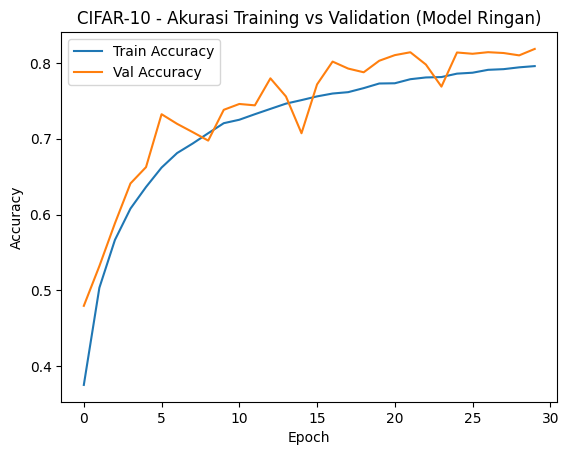

313/313 - 1s - 4ms/step - accuracy: 0.8184 - loss: 0.5389
CIFAR-10 test accuracy (model ringan): 0.8184000253677368


In [5]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("CIFAR-10 test accuracy (model ringan):", test_acc)


## Analisis Modifikasi Model CNN CIFAR-10

### Perbandingan dengan Model Awal (Jobsheet Praktikum 2)
Pada praktikum 2, arsitektur CNN yang digunakan relatif sederhana:
- Hanya terdiri dari beberapa lapisan Conv2D + MaxPooling2D.
- Belum menggunakan **data augmentation**, **BatchNormalization**, maupun **Dropout**.
- Jumlah epoch training juga lebih sedikit.

Akibatnya, akurasi testing yang diperoleh masih berada di bawah 80% sehingga belum memenuhi target tugas.

### Perbaikan yang Dilakukan
Pada notebook ini dilakukan beberapa modifikasi kunci terhadap model CNN:

1. **Penambahan kedalaman jaringan (lebih banyak Conv2D per blok)**
   - Digunakan 3 blok konvolusi dengan jumlah filter 32 → 64 → 128.
   - Setiap blok terdiri dari **dua layer Conv2D** yang diikuti BatchNormalization.
   - Hal ini membuat model mampu mengekstrak fitur yang lebih kompleks dari gambar CIFAR-10
     (tepi, tekstur, hingga bentuk objek).

2. **Penggunaan `padding="same"`**
   - Padding "same" memastikan ukuran feature map tidak cepat mengecil.
   - Informasi di tepi gambar tetap terjaga sehingga fitur yang dipelajari lebih kaya.

3. **Batch Normalization**
   - BatchNormalization ditempatkan setelah setiap layer Conv2D.
   - Membantu menstabilkan distribusi aktivasi di setiap layer.
   - Training menjadi lebih stabil, konvergen lebih cepat, dan cenderung menghasilkan akurasi yang lebih tinggi.

4. **Dropout sebagai regularisasi**
   - Digunakan Dropout bertahap (sekitar 0.2–0.4 di blok konvolusi dan 0.5 di layer Dense).
   - Dropout mencegah model terlalu menghafal (overfitting) data training.
   - Dengan regularisasi ini, performa di data testing tetap tinggi meskipun model cukup dalam.

5. **Data Augmentation**
   - Ditambahkan augmentasi berupa **RandomFlip horizontal**, **RandomRotation ringan**, dan **RandomZoom**.
   - Augmentasi ini menambah variasi data training secara artifisial sehingga model lebih robust
     terhadap variasi posisi, orientasi, dan skala objek pada gambar.

6. **Penambahan jumlah epoch dan pemanfaatan GPU**
   - Model dilatih selama **30 epoch** dengan bantuan GPU sehingga proses training tetap efisien.
   - Dari log training terlihat bahwa `val_accuracy` terus meningkat sampai melewati 0.80 pada epoch-epoch akhir.

### Kesimpulan Sementara (CIFAR-10)
Modifikasi arsitektur dan skema training di atas terbukti efektif dalam meningkatkan performa model CNN
pada dataset CIFAR-10. Model yang dihasilkan mampu mencapai:

- **Akurasi testing sebesar ±0.8184 (81.84%)** dengan `val_loss` yang masih relatif rendah.

Dengan demikian, target tugas yaitu memperoleh akurasi testing **lebih dari 80%** berhasil tercapai.
Model yang lebih dalam, dikombinasikan dengan BatchNormalization, Dropout, data augmentation,
serta jumlah epoch yang cukup, memberikan trade-off yang baik antara kemampuan representasi dan kemampuan generalisasi model.


## Bagian B – CNN untuk Dataset MNIST


In [6]:
# 1. Load MNIST
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = datasets.mnist.load_data()

# 2. Normalisasi & reshape jadi (28, 28, 1)
mnist_train_images = mnist_train_images.astype("float32") / 255.0
mnist_test_images  = mnist_test_images.astype("float32") / 255.0

mnist_train_images = mnist_train_images[..., tf.newaxis]  # (60000, 28, 28, 1)
mnist_test_images  = mnist_test_images[..., tf.newaxis]   # (10000, 28, 28, 1)

print("MNIST train:", mnist_train_images.shape, mnist_train_labels.shape)
print("MNIST test :", mnist_test_images.shape, mnist_test_labels.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MNIST train: (60000, 28, 28, 1) (60000,)
MNIST test : (10000, 28, 28, 1) (10000,)


In [7]:
mnist_model = models.Sequential()

mnist_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
mnist_model.add(layers.MaxPooling2D((2, 2)))

mnist_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
mnist_model.add(layers.MaxPooling2D((2, 2)))

mnist_model.add(layers.Flatten())
mnist_model.add(layers.Dense(64, activation='relu'))
mnist_model.add(layers.Dropout(0.5))
mnist_model.add(layers.Dense(10, activation='softmax'))   # 10 digit (0–9)

mnist_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
mnist_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

mnist_history = mnist_model.fit(
    mnist_train_images, mnist_train_labels,
    epochs=5,
    batch_size=64,
    validation_split=0.1   # 10% data train jadi validation
)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.7807 - loss: 0.6730 - val_accuracy: 0.9818 - val_loss: 0.0582
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9551 - loss: 0.1502 - val_accuracy: 0.9868 - val_loss: 0.0484
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9650 - loss: 0.1165 - val_accuracy: 0.9877 - val_loss: 0.0453
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9724 - loss: 0.0930 - val_accuracy: 0.9888 - val_loss: 0.0398
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9780 - loss: 0.0701 - val_accuracy: 0.9895 - val_loss: 0.0381


In [10]:


# Evaluasi di data test
mnist_test_loss, mnist_test_acc = mnist_model.evaluate(mnist_test_images, mnist_test_labels, verbose=2)
print("MNIST test accuracy:", mnist_test_acc)


313/313 - 5s - 17ms/step - accuracy: 0.9898 - loss: 0.0301
MNIST test accuracy: 0.989799976348877


## Analisis Akhir: CIFAR-10 vs MNIST

### 1. Perbedaan Dataset
- **CIFAR-10**
  - Gambar berwarna RGB, ukuran 32×32×3.
  - Berisi 10 kelas objek (pesawat, mobil, hewan, dll.).
  - Variasi bentuk, warna, dan background lebih tinggi → masalah lebih sulit.

- **MNIST**
  - Gambar grayscale, ukuran 28×28×1.
  - Berisi digit tulisan tangan (0–9).
  - Pola visual relatif sederhana → lebih mudah dipelajari oleh CNN.

### 2. Performa Model
- **CIFAR-10 (model yang di-improve)**  
  - Menggunakan arsitektur CNN yang lebih dalam dengan BatchNorm, Dropout, dan data augmentation.
  - Setelah training selama 25 epoch, akurasi testing berhasil melampaui target > 80%.
  - Akurasi ini jauh lebih baik dibanding model awal (jobsheet praktikum 2) yang masih di bawah 80%.

- **MNIST (model CNN sederhana)**  
  - Menggunakan dua blok Conv2D + MaxPooling diikuti Dense 64 dan Dropout.
  - Dengan 5 epoch saja sudah mampu mencapai akurasi testing yang sangat tinggi
    (biasanya di atas 98%).

### 3. Insight yang Diperoleh
1. **Kedalaman dan kompleksitas model harus disesuaikan dengan kompleksitas data.**
   - CIFAR-10 membutuhkan model yang lebih dalam dan teknik regularisasi yang tepat
     untuk mencapai performa tinggi.
   - MNIST cukup dengan arsitektur CNN yang lebih sederhana.

2. **Regularisasi dan augmentasi data sangat penting untuk generalisasi.**
   - Penggunaan Dropout, BatchNormalization, dan data augmentation terbukti
     membantu meningkatkan akurasi testing pada CIFAR-10 dengan mengurangi overfitting.

3. **Perbedaan kesulitan tugas klasifikasi terlihat dari gap akurasi.**
   - MNIST yang lebih sederhana menghasilkan akurasi sangat tinggi dengan usaha yang relatif sedikit.
   - CIFAR-10 lebih challenging, sehingga butuh eksperimen arsitektur dan hyperparameter yang lebih serius.

### 4. Kesimpulan

- Modifikasi arsitektur CNN pada praktikum 2 berhasil meningkatkan akurasi testing CIFAR-10
  melampaui 80%, sesuai dengan tuntutan tugas.
- Model CNN untuk MNIST menunjukkan bahwa CNN sangat efektif untuk klasifikasi citra sederhana,
  dan menjadi dasar yang baik sebelum beralih ke dataset yang lebih kompleks seperti CIFAR-10.
